In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pokemon_df = pd.read_csv('pokedex_(Update_05.20).csv')
pokemon_df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [3]:
pokemon_df.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [4]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [5]:
pokemon_df.shape

(1028, 51)

In [6]:
pokemon_df.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [7]:
pokemon_df = pokemon_df.drop('Unnamed: 0', axis=1)

columns_to_drop = ['japanese_name', 'german_name', 'against_normal', 'against_fire',
                  'against_water', 'against_electric', 'against_grass', 'against_ice',
                  'against_fight', 'against_poison', 'against_ground', 'against_flying',
                  'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
                  'against_dragon', 'against_dark', 'against_steel', 'against_fairy'
                  ]

pokemon_df = pokemon_df.drop(columns_to_drop, axis = 1)

In [8]:
# Get index and print row of pokemon having highest total_points
highest_tot_points_idx = pokemon_df['total_points'].idxmax()
pokemon_df.loc[highest_tot_points_idx,:]

pokedex_number                      890
name                Eternatus Eternamax
generation                            8
status                        Legendary
species                Gigantic Pokémon
type_number                           2
type_1                           Poison
type_2                           Dragon
height_m                            100
weight_kg                           NaN
abilities_number                      0
ability_1                           NaN
ability_2                           NaN
ability_hidden                      NaN
total_points                       1125
hp                                  255
attack                              115
defense                             250
sp_attack                           125
sp_defense                          250
speed                               130
catch_rate                          NaN
base_friendship                     NaN
base_experience                     NaN
growth_rate                        Slow


In [9]:
# Select mega pokemons, dinamax and alolan pokemons
mega_pokemons = pokemon_df.index[pokemon_df['name'].apply(lambda x: 'Mega ' in x)].tolist()
dinamax_pokemons = pokemon_df.index[pokemon_df['name'].apply(lambda x: 'max' in x)].tolist()
alolan_pokemons = pokemon_df[pokemon_df.name.apply(lambda x: 'Alolan' in x) == True].index.tolist()

# Concatenate
to_delete = np.concatenate((mega_pokemons, dinamax_pokemons, alolan_pokemons))

# Remove
pokemon_df = pokemon_df.drop(to_delete, axis=0)

In [10]:
# Cheacking again after dropping mega, dinamax and alolan:
# Get index and print row of pokemon having highest total_points
highest_tot_points_idx = pokemon_df['total_points'].idxmax()
pokemon_df.loc[highest_tot_points_idx,:]

pokedex_number                    382
name                    Primal Kyogre
generation                          3
status                      Legendary
species             Sea Basin Pokémon
type_number                         1
type_1                          Water
type_2                            NaN
height_m                          9.8
weight_kg                         430
abilities_number                    1
ability_1              Primordial Sea
ability_2                         NaN
ability_hidden                    NaN
total_points                      770
hp                                100
attack                            150
defense                            90
sp_attack                         180
sp_defense                        160
speed                              90
catch_rate                          5
base_friendship                     0
base_experience                   347
growth_rate                      Slow
egg_type_number                     1
egg_type_1  

In [11]:
features_stats = ['total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed']

In [12]:
def find_min_and_max(column_name):
    '''
    Get pokemon name according to its max and min attribute: column_name
    column_name: array of int or float
    '''
    
    # Find max
    max_index = pokemon_df[column_name].idxmax()
    max_pokemon = pokemon_df.loc[max_index, 'name']
    
    # Find min
    min_index = pokemon_df[column_name].idxmin()
    min_pokemon = pokemon_df.loc[min_index, 'name']
    
    print(f'Pokemon with min {column_name}: {min_pokemon}\nPokemon with max {column_name}: {max_pokemon}\n')
    return min_index, max_index

In [13]:
features_stats

['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

In [14]:

min_dict = {}
max_dict = {}
max_labels=[]
min_labels=[]

for stat in features_stats:
    min_index, max_index = find_min_and_max(stat)
    max_dict[stat] = pokemon_df.loc[max_index, stat]
    min_dict[stat] = pokemon_df.loc[min_index, stat]
    max_labels.append(pokemon_df.loc[max_index, 'name'])
    min_labels.append(pokemon_df.loc[min_index, 'name'])

Pokemon with min total_points: Wishiwashi Solo Form
Pokemon with max total_points: Primal Kyogre

Pokemon with min hp: Shedinja
Pokemon with max hp: Blissey

Pokemon with min attack: Chansey
Pokemon with max attack: Kartana

Pokemon with min defense: Chansey
Pokemon with max defense: Shuckle

Pokemon with min sp_attack: Shuckle
Pokemon with max sp_attack: Primal Kyogre

Pokemon with min sp_defense: Caterpie
Pokemon with max sp_defense: Shuckle

Pokemon with min speed: Shuckle
Pokemon with max speed: Deoxys Speed Forme



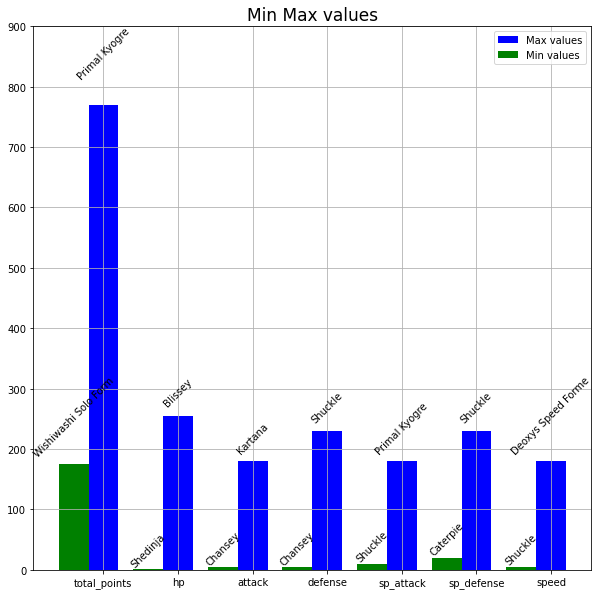

In [15]:
X = np.arange(len(max_dict))
fig, ax = plt.subplots(1, figsize=(10,10))

p1 = ax.bar(X, max_dict.values(), width=0.4, color='b', align='center')
p2 = ax.bar(X-0.4, min_dict.values(), width=0.4, color='g', align='center')
ax.legend(('Max values','Min values'))
plt.xticks(X, max_dict.keys())
plt.title("Min Max values", fontsize=17)
plt.grid()

def autolabel(bar_plot, bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=45)
autolabel(p1, max_labels)
autolabel(p2, min_labels)
plt.ylim((0,900))
plt.show()

In [16]:
t1_by_gen = pd.crosstab(pokemon_df['generation'],pokemon_df['type_1'])
t1_by_gen

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
generation,,,,,,,,,,,,,,,,,,
1,12,0,3,10,2,8,12,0,3,12,8,2,23,15,11,9,1,28
2,10,5,0,6,5,2,8,0,2,9,3,4,15,1,7,4,2,18
3,12,6,7,4,0,4,7,0,4,12,7,7,18,3,11,8,9,26
4,10,3,3,12,1,2,5,0,7,14,4,3,17,6,7,6,3,13
5,18,13,9,8,0,7,9,2,5,15,12,9,18,2,14,6,4,19
6,3,3,6,3,9,3,8,2,10,5,0,2,4,2,5,8,5,6
7,9,1,3,5,1,4,6,0,5,12,2,0,12,6,10,9,4,10
8,3,6,3,10,4,6,5,4,3,8,3,4,4,1,6,4,4,9


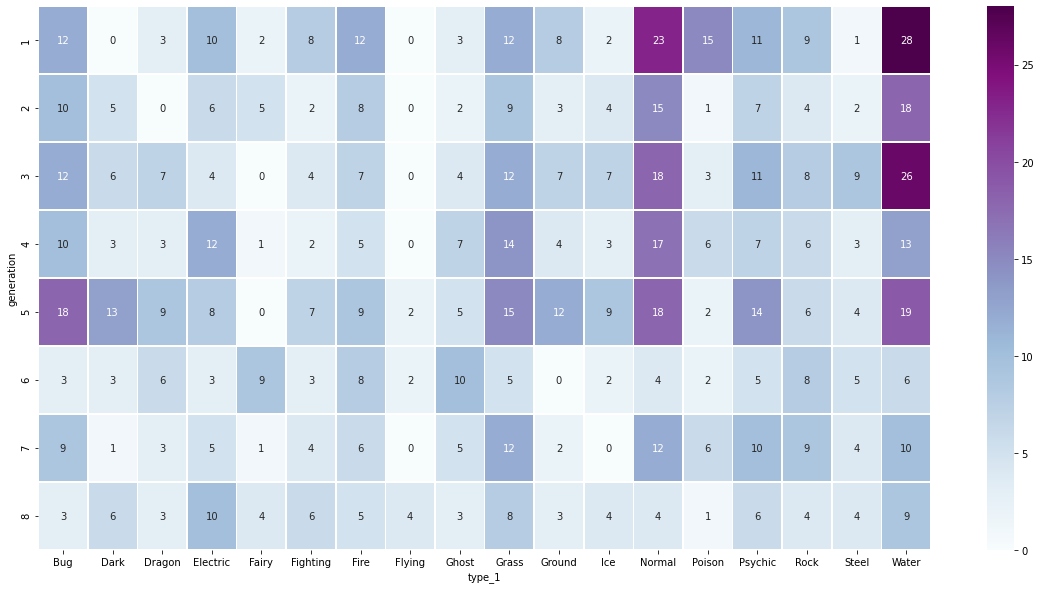

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(t1_by_gen, annot=True, linewidths=0.5, cmap="BuPu");

In [18]:
t2_by_gen = pd.crosstab(pokemon_df['generation'],pokemon_df['type_2'])

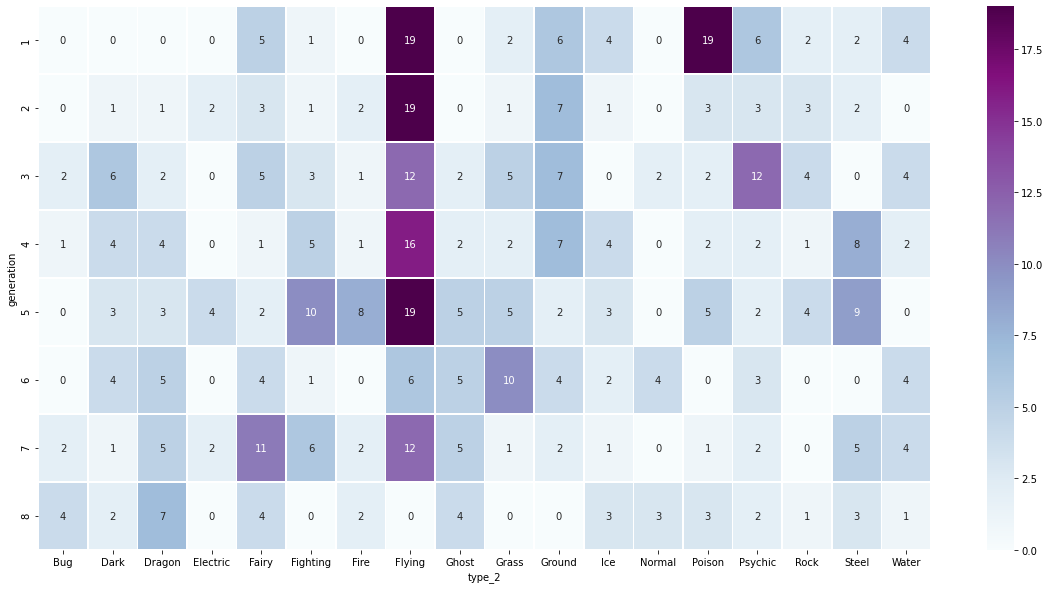

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(t2_by_gen, annot=True, linewidths=0.5, cmap="BuPu");

In [20]:
stats_df = pokemon_df[features_stats]

In [21]:
stats_df.head()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0
5,405.0,58.0,64.0,58.0,80.0,65.0,80.0


In [22]:
stats_df.describe()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,428.675338,69.145682,77.813736,72.723205,71.024974,70.751301,67.216441
std,114.978017,26.080556,30.655778,29.633778,30.737420,27.281586,28.865258
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,325.000000,50.000000,55.000000,50.000000,48.000000,50.000000,45.000000
50%,450.000000,65.000000,75.000000,70.000000,65.000000,69.000000,65.000000
75%,505.000000,80.000000,100.000000,90.000000,91.000000,87.000000,90.000000
max,770.000000,255.000000,181.000000,230.000000,180.000000,230.000000,180.000000


In [23]:
stats_df.corr().round(2)

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
total_points,1.00,0.65,0.72,0.62,0.73,0.70,0.56
hp,0.65,1.00,0.45,0.27,0.37,0.36,0.19
attack,0.72,0.45,1.00,0.43,0.36,0.22,0.37
defense,0.62,0.27,0.43,1.00,0.21,0.53,0.00
sp_attack,0.73,0.37,0.36,0.21,1.00,0.50,0.43
sp_defense,0.70,0.36,0.22,0.53,0.50,1.00,0.21
speed,0.56,0.19,0.37,0.00,0.43,0.21,1.00


For example, if we look at the `attack` stat, it's lowest correlation is with the `sp_defense` stat (0.26) and it's highest is with `total_points`.

Correlation with `total_points` is actually a bit cheap, as it is the highest correlation of every stat, which makes sense.

To visualize this correlations, we plot a 2D KDE plot with seaborn:

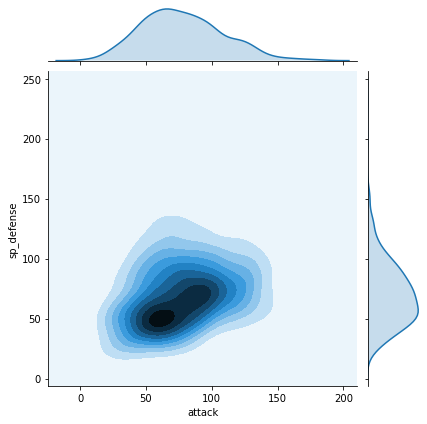

In [24]:
sns.jointplot(x=stats_df['attack'], y=stats_df['sp_defense'], kind="kde");

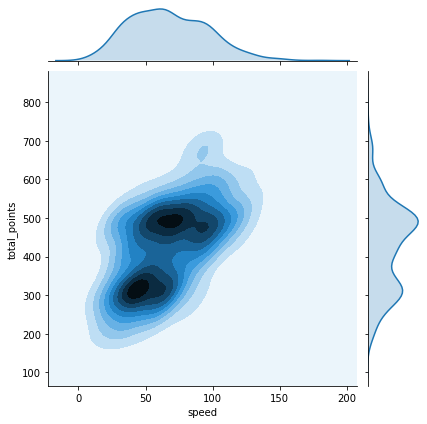

In [25]:
sns.jointplot(x=stats_df['speed'], y=stats_df['total_points'], kind="kde");

To get a visual of how stats are distributed, we can check the `scatter_matrix` for the whole data set.

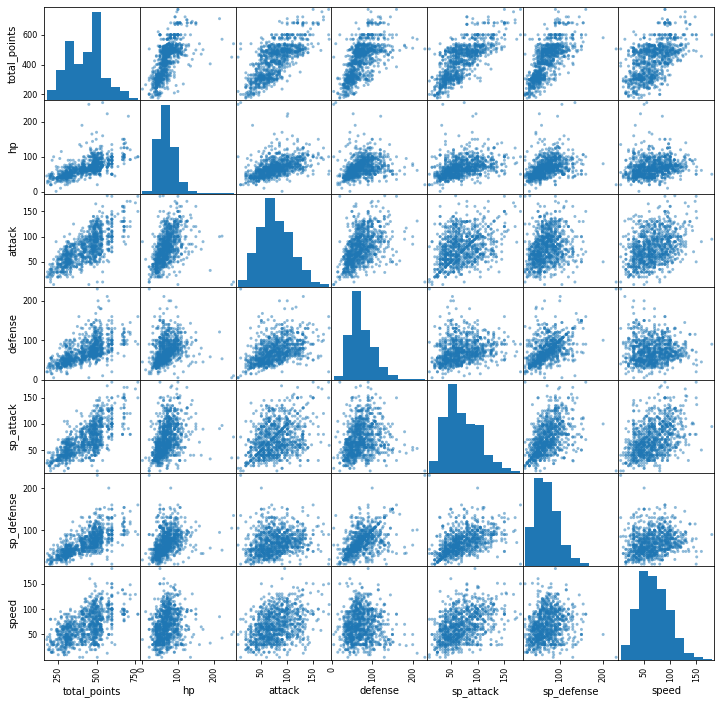

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(stats_df, figsize=[12,12])

plt.show()

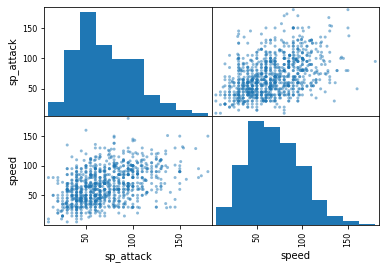

In [27]:
# Checking sp attack vs. speed
scatter_matrix(stats_df.iloc[: , [4,6]])

plt.show()

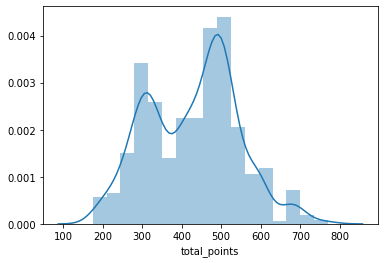

In [28]:
# Using seaborn to analyze distributions

# Let's check total_points first

sns.distplot(stats_df['total_points']);

This is the only stat that shows two distinct peaks in distribution.

In [29]:
# Defining a function to plot distribtion of stat and fiting to a normal curve
# Function plots the fitting parameters

def fit_stats(df, stat, show = True, label=None):
    # attack
    ax = sns.distplot(df[stat], label=label, kde=False, fit=stats.norm);

    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(df[stat])

    print (f"mu={mu}, sigma={sigma}")
    # Legend and labels 
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')

    # Cross-check this is indeed the case - should be overlaid over black curve
    x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
    ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma),
               "cross-check"])
        
    if not show:
        plt.close()

    return [mu, sigma]

mu=77.81373569198752, sigma=30.639823961167732


[77.81373569198752, 30.639823961167732]

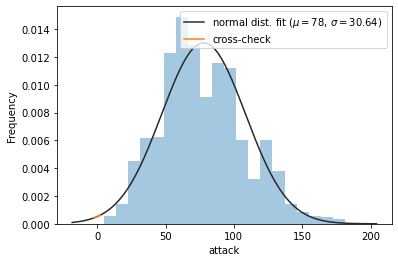

In [30]:
fit_stats(stats_df,'attack')

mu=67.21644120707596, sigma=28.850235486858125


[67.21644120707596, 28.850235486858125]

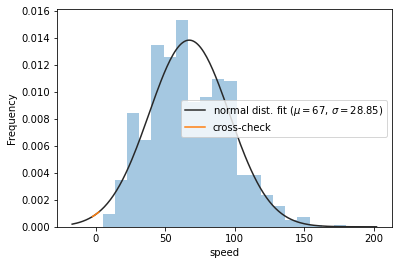

In [31]:
fit_stats(stats_df,'speed')

# Stats for individual generations

Now, we are going to look into the generations separately.

In [32]:
features_stas_gen = ['total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'status', 'generation']

In [33]:
status_df = pokemon_df[features_stas_gen]
status_df.head()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,status,generation
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Normal,1
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Normal,1
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Normal,1
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Normal,1
5,405.0,58.0,64.0,58.0,80.0,65.0,80.0,Normal,1


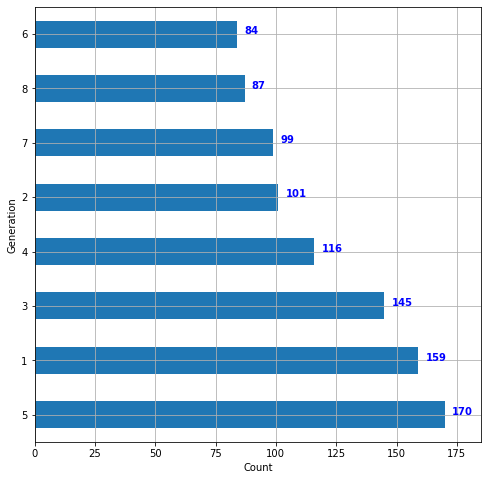

In [158]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
y = pd.value_counts(status_df['generation'].values) 
y.plot(kind='barh', ax=ax)
for i, v in enumerate(y):
    ax.text(v + 3, i , str(v), color='blue', fontweight='bold')
plt.xlim((0,185))
plt.xlabel('Count')
plt.ylabel('Generation')
plt.grid()

In [34]:
# Encoding 'status' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
status_df['status_encoded'] = le.fit_transform(status_df['status'])

<ipython-input-34-806c3e72d91e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df['status_encoded'] = le.fit_transform(status_df['status'])


In [35]:
status_df.head()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,status,generation,status_encoded
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Normal,1,2
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Normal,1,2
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Normal,1,2
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Normal,1,2
5,405.0,58.0,64.0,58.0,80.0,65.0,80.0,Normal,1,2


In [36]:
status_df.tail()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,status,generation,status_encoded
1022,720.0,92.0,170.0,115.0,80.0,115.0,148.0,Legendary,8,0
1023,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Legendary,8,0
1024,720.0,92.0,130.0,145.0,80.0,145.0,128.0,Legendary,8,0
1025,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Legendary,8,0
1026,690.0,140.0,85.0,95.0,145.0,95.0,130.0,Legendary,8,0


In [37]:
status_df['status_encoded'].unique()

array([2, 3, 0, 1])

In [38]:
status_df['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

Let's check the `attack` vs. `sp_attack` graph with colors representing status.

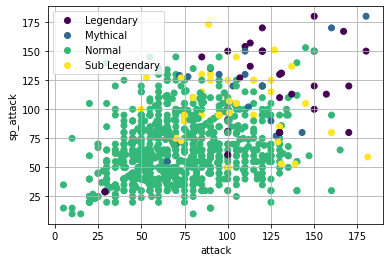

In [39]:
status_name_dict = {'Legendary' : 0,
                    'Mythical' : 1,
                    'Normal' : 2,
                    'Sub Legendary' : 3}

scatter = plt.scatter(status_df['attack'], status_df['sp_attack'],
                      c = status_df['status_encoded'])

plt.xlabel('attack')
plt.ylabel('sp_attack')

plt.legend(handles=scatter.legend_elements()[0], labels = status_name_dict.keys())

plt.grid()
plt.show()

As expected, **Legendary** pokemon have high attack and special attack.

If we use **generation** as the color column we see it is very balanced.

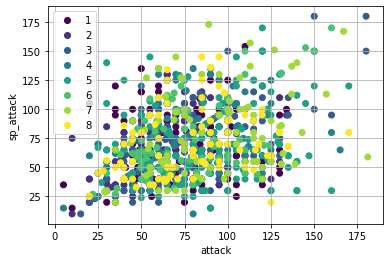

In [40]:
scatter = plt.scatter(status_df['attack'], status_df['sp_attack'],
                      c = status_df['generation'])

plt.xlabel('attack')
plt.ylabel('sp_attack')

plt.legend(handles=scatter.legend_elements()[0], labels = list(range(1,9)))

plt.grid()
plt.show()

## How are stats distributed in generations?

First we filter the DataFrame to check each generation separately.

In [41]:
# Filtering by generation:

gen_1 = status_df.loc[status_df['generation'] == 1]
gen_1.head()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,status,generation,status_encoded
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Normal,1,2
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Normal,1,2
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Normal,1,2
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Normal,1,2
5,405.0,58.0,64.0,58.0,80.0,65.0,80.0,Normal,1,2


In [42]:
gen_1.describe()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,generation,status_encoded
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0,159.000000
mean,408.465409,63.761006,73.364780,68.188679,67.270440,66.232704,69.647799,1.0,2.000000
std,98.412641,27.980884,26.287703,26.651803,28.017329,23.837582,27.088261,0.0,0.225018
min,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0,0.000000
25%,320.000000,45.000000,53.500000,50.000000,45.000000,50.000000,49.000000,1.0,2.000000
50%,410.000000,60.000000,72.000000,65.000000,65.000000,65.000000,70.000000,1.0,2.000000
75%,490.000000,78.500000,92.000000,81.500000,85.000000,80.000000,90.000000,1.0,2.000000
max,680.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,1.0,3.000000


In [49]:
gen_dict = {}
for i in range(1,9):
    gen_dict[f'gen_{i}'] = status_df.loc[status_df['generation'] == i]

### Radar chart for "mean Pokemon" by generation

In [177]:
def plot_radar(gen):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")

    # theta has 6 different angles, and the first one repeated
    use = gen.drop(['total_points','generation','status_encoded'], axis=1).describe()
    theta = np.arange(len(use.columns) + 1) / float(len(use.columns)) * 2 * np.pi
    # values has the 6 values from stats, with the first element repeated
    values = use.loc['mean'].values
    values = np.append(values, values[0])

    # draw the polygon and the mark the points for each angle/value combination
    l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
    plt.xticks(theta[:-1], use.columns, color='grey', size=12)
    ax.tick_params(pad=10) # to increase the distance of the labels to the plot
    # fill the area of the polygon with green and some transparency
    ax.fill(theta, values, 'green', alpha=0.1)

    # plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
    plt.title("Mean generation 1 Pokemon")
    plt.show()

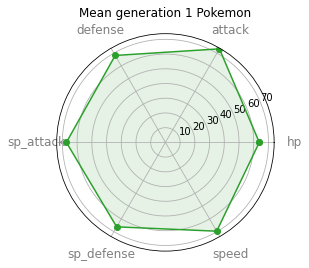

In [178]:
plot_radar(gen_dict['gen_1'])

In [189]:
def plot_radar_all(gen_dict):
    fig = plt.figure(figsize=(15,15))
    i=1
    for k in gen_dict:
        gen=gen_dict[k]
        ax = fig.add_subplot(2,4,i, projection="polar")

        # theta has 6 different angles, and the first one repeated
        use = gen.drop(['total_points','generation','status_encoded'], axis=1).describe()
        theta = np.arange(len(use.columns) + 1) / float(len(use.columns)) * 2 * np.pi
        # values has the 6 values from stats, with the first element repeated
        values = use.loc['mean'].values
        values = np.append(values, values[0])

        # draw the polygon and the mark the points for each angle/value combination
        l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
        plt.xticks(theta[:-1], use.columns, color='grey', size=12)
        ax.tick_params(pad=10) # to increase the distance of the labels to the plot
        # fill the area of the polygon with green and some transparency
        ax.fill(theta, values, 'green', alpha=0.1)

        # plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
        plt.title("Mean gen"+ str(i) +" Pokemon")
        i+=1
        fig.tight_layout(pad=3.0)
    plt.show()

## Radar chart of "mean pokemon" for all generations

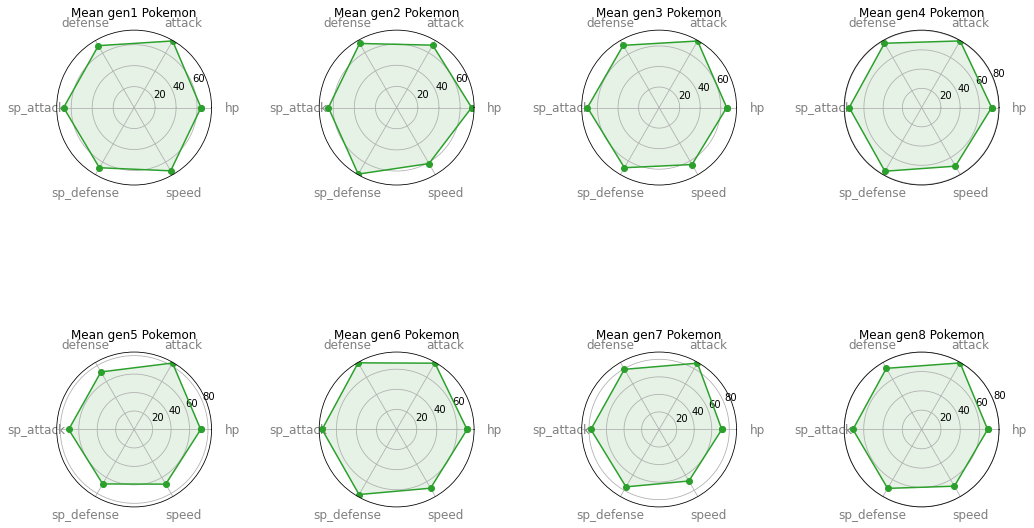

In [190]:
plot_radar_all(gen_dict)

In [50]:
# Function to plot stat by generation
def plotStatGen(df, stat):
    gen_dict = {}
    for i in range(1,9):
        gen_dict[f'gen_{i}'] = df.loc[df['generation'] == i]
        
    gen_stat = []
    for k in gen_dict:
        gen_stat.append(gen_dict[k][stat].mean())
    
    plt.plot(range(1,9), gen_stat, 'o-')
    plt.title('Mean '+ stat + ' by genertion')
    plt.xlabel('Generation')
    plt.ylabel('Mean ' + stat)

    plt.grid()
    plt.show()

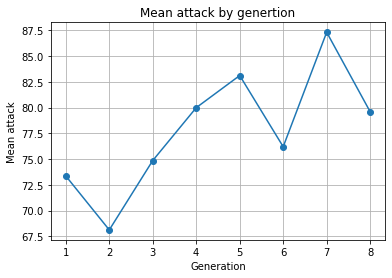

In [51]:
plotStatGen(status_df, 'attack')

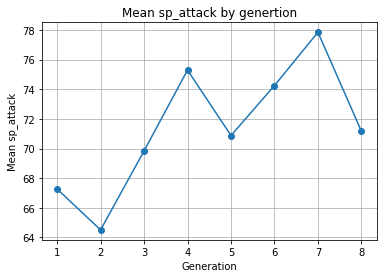

In [52]:
plotStatGen(status_df, 'sp_attack')

### Plotting mean values for all stats by generation

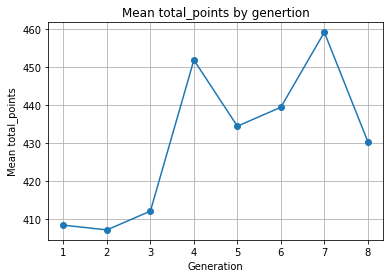

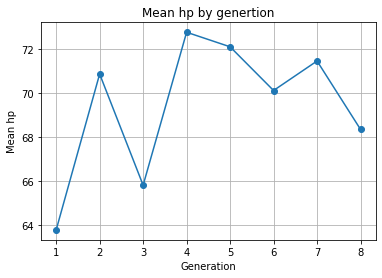

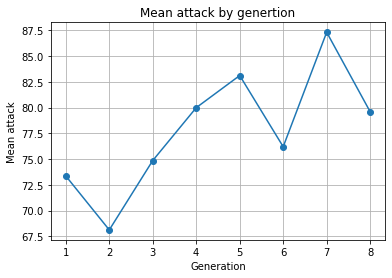

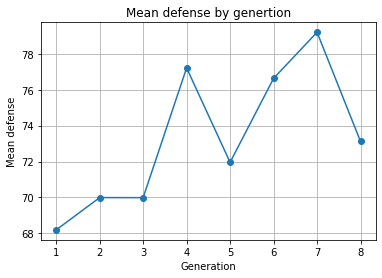

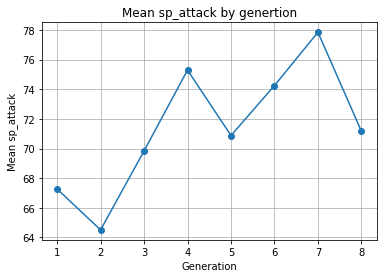

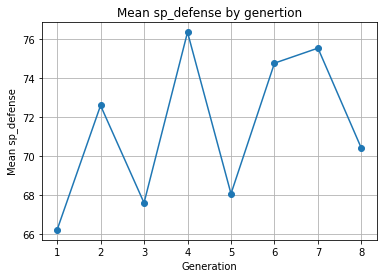

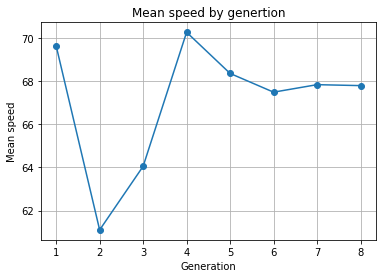

In [53]:
for i in features_stats:
    plotStatGen(status_df, i)

mu=73.36477987421384, sigma=26.20490649330033


[73.36477987421384, 26.20490649330033]

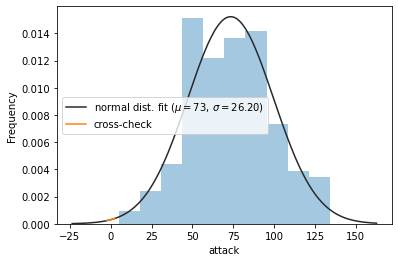

In [54]:
# We can look at the mean and std of a stat distribution by generation using seaborn and the gen's dataframes.

# Example with 'attack' in gen 1
fit_stats(gen_dict['gen_1'], 'attack')


### If we try to see all generations in a single graph:

mu=73.36477987421384, sigma=26.20490649330033
mu=68.12871287128714, sigma=28.166992608383403
mu=74.86206896551724, sigma=32.62506349623208
mu=79.99137931034483, sigma=30.021973472790748
mu=83.11176470588235, sigma=30.94101375488416
mu=76.20238095238095, sigma=28.41519536558563
mu=87.31313131313131, sigma=33.700297173598
mu=79.59770114942529, sigma=30.763637204102356


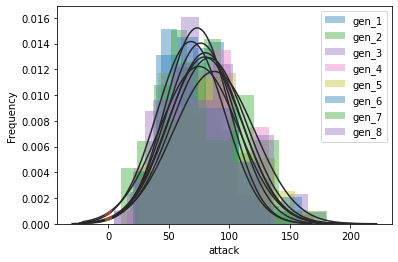

In [55]:
for k in gen_dict:
    fit_stats(gen_dict[k], 'attack', show=True, label=k)
plt.legend();

That's very messy!

In [56]:
# Let's just plot the mean and std from fit by generation
gen_attack_params=[]
for k in gen_dict:
    gen_attack_params.append(fit_stats(gen_dict[k], 'attack', show=False, label=k))

mu=73.36477987421384, sigma=26.20490649330033
mu=68.12871287128714, sigma=28.166992608383403
mu=74.86206896551724, sigma=32.62506349623208
mu=79.99137931034483, sigma=30.021973472790748
mu=83.11176470588235, sigma=30.94101375488416
mu=76.20238095238095, sigma=28.41519536558563
mu=87.31313131313131, sigma=33.700297173598
mu=79.59770114942529, sigma=30.763637204102356


In [57]:
gen_attack_params = np.array(gen_attack_params)
gen_attack_params

array([[73.36477987, 26.20490649],
       [68.12871287, 28.16699261],
       [74.86206897, 32.6250635 ],
       [79.99137931, 30.02197347],
       [83.11176471, 30.94101375],
       [76.20238095, 28.41519537],
       [87.31313131, 33.70029717],
       [79.59770115, 30.7636372 ]])

In [58]:
# As function
def mean_std_gen(gen_dict, stat):
    gen_params=[]
    
    for k in gen_dict:
        gen_params.append(fit_stats(gen_dict[k], stat, show=False, label=k))
    plt.close()
    gen_params = np.array(gen_params)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(range(1,9),gen_params[:,0], 'o-')
    ax1.grid()
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Mean '+stat)
    ax2.plot(range(1,9),gen_params[:,1], 'o-')
    ax2.grid()
    ax2.set_xlabel('Generation')
    ax2.set_ylabel('std of '+stat)
    
    fig.suptitle('Parameters for '+stat)


mu=408.4654088050315, sigma=98.10267884162012
mu=407.2079207920792, sigma=111.33762023608782
mu=412.15862068965515, sigma=122.93012738457223
mu=451.9310344827586, sigma=116.17731128559713
mu=434.51176470588234, sigma=107.28166546034153
mu=439.48809523809524, sigma=115.35302894526902
mu=459.2323232323232, sigma=122.68089741916745
mu=430.4367816091954, sigma=120.61096394658621


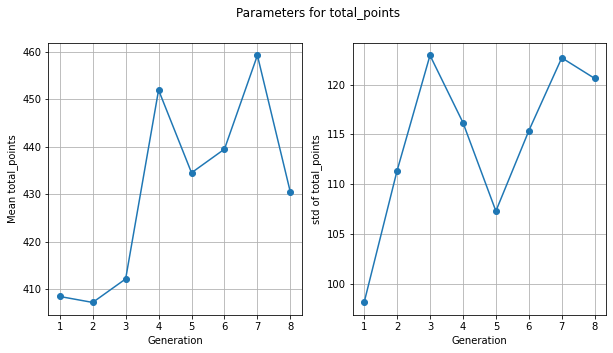

In [59]:
mean_std_gen(gen_dict, 'total_points')

We can see that generation 7 has the highest mean `total_points` and generation 2 has the lowest.
From the second graph, generation 8 has the more spread out distribution of `total_points`.

mu=69.64779874213836, sigma=27.0029437865927
mu=61.0990099009901, sigma=27.149933884096164
mu=64.0551724137931, sigma=28.997926040071313
mu=70.28448275862068, sigma=27.517018569230167
mu=68.37058823529412, sigma=29.12161648522971
mu=67.5, sigma=26.384293668410994
mu=67.84848484848484, sigma=31.103075178880683
mu=67.80459770114942, sigma=32.825851559179426


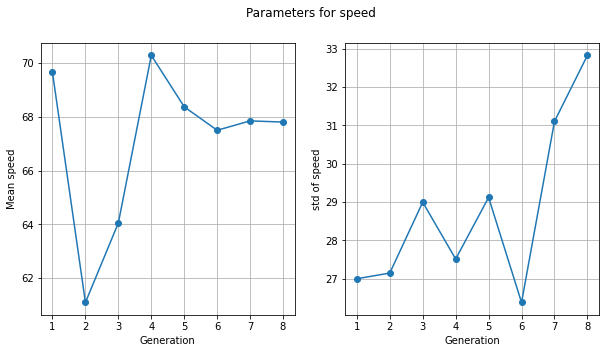

In [102]:
mean_std_gen(gen_dict, 'speed')

Generation 2 is home to some slow pokemon...

# Modelling: unsupervised learning

## 1. Preprocessing

In [60]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Compute mean and std to be used for scaling

scaler.fit(stats_df)

StandardScaler()

In [61]:
# Mean
print(scaler.mean_)

# Std
print(scaler.scale_)

[428.67533819  69.14568158  77.81373569  72.72320499  71.02497399
  70.75130073  67.21644121]
[114.91817976  26.06698337  30.63982396  29.61835589  30.72142295
  27.26738838  28.85023549]


In [62]:
X = scaler.transform(stats_df)

X

array([[-0.96307946, -0.92629367, -0.94040148, ..., -0.19611637,
        -0.21092232, -0.770061  ],
       [-0.20601908, -0.35085309, -0.51611705, ...,  0.29214226,
         0.33918537, -0.25013457],
       [ 0.83820212,  0.41640102,  0.13662821, ...,  0.94315377,
         1.07266229,  0.44310067],
       ...,
       [ 2.53506158,  0.87675348,  1.70321685, ...,  0.29214226,
         2.72298536,  2.10686526],
       [ 2.09996941,  0.87675348,  1.70321685, ...,  0.29214226,
         1.62276998,  2.45348288],
       [ 2.27400627,  2.71816333,  0.23454   , ...,  2.40792968,
         0.88929306,  2.17618878]])

In [63]:
# Sanity check
X.mean(axis = 0)

array([-2.36601119e-16, -2.36601119e-16, -1.47875699e-16,  2.95751399e-17,
       -2.95751399e-17, -1.70057054e-16,  9.61192046e-17])

In [64]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

## 2. Using KMeans

In [65]:
# K-means modeling

from sklearn.cluster import KMeans

# Instantiate
kmeans = KMeans(n_clusters = 3)

# Fit
kmeans.fit(X)

# Make predictions
y_preds = kmeans.predict(X)

print(y_preds)

[0 1 2 0 1 2 0 1 2 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 2 0 1 0 0 1 0 0 1 0 1
 0 2 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 2 0 1 0 2 0 0 1 0 0 2 0 1 1 0 0 1 0
 2 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 2 1 0 1 0 1 0 2 0 2 0 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 2 2 1 1 2 2 2 1 1 0 1 2 0 0 1 2 2 2 1 0 1 0
 1 2 1 2 2 2 0 1 2 2 2 0 1 1 0 1 2 0 1 1 0 1 0 1 0 0 0 1 2 0 1 0 0 0 0 1 0
 1 0 0 2 1 0 1 1 1 0 0 1 0 0 1 0 0 1 2 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 2 2 0 1 2 1 0 0 1 0 0 0 1 2 2 2 2 0 1 2 2 2
 2 0 0 2 0 1 2 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 2 0 1 0
 1 0 1 2 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 2 0 1 1 1 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 2 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 2 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 0 1 2 0 1 1 1 0 0 1 2 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1
 1 0 1 2 0 1 2 0 0 1 0 1 0 0 0 0 2 0 2 0 1 0 1 0 1 1 1 1 0 1 1 0 2 0 1 0 1
 1 0 2 0 1 2 2 0 1 0 0 1 0 1 0 0 0 1 1 0 1 2 1 0 2 0 1 0 1 0 1 1 0 1 0 0 1
 1 2 1 1 1 2 2 2 2 1 2 1 

In [66]:
unique_poke, counts_poke = np.unique(y_preds, return_counts=True)
print(unique_poke)
print(counts_poke)

[0 1 2]
[351 391 219]


In [67]:
# Turn into dict
clusters = dict(zip(unique_poke, counts_poke))

clusters

{0: 351, 1: 391, 2: 219}

In [68]:
# Coordinates of the three centroids
kmeans.cluster_centers_

array([[-1.09789605, -0.74617475, -0.78074854, -0.74209437, -0.72517915,
        -0.80083837, -0.57887818],
       [ 0.31397726,  0.2999393 ,  0.35181712,  0.45223449, -0.07865125,
         0.23479153,  0.00357889],
       [ 1.19907034,  0.66041585,  0.62320659,  0.38197004,  1.30269643,
         0.86434145,  0.92140134]])

In [69]:
stats_df.head()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0
5,405.0,58.0,64.0,58.0,80.0,65.0,80.0


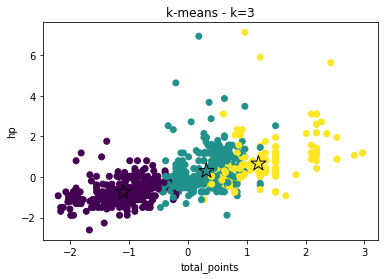

In [70]:
plt.scatter(X[:,0], X[:,1], c = y_preds)

# Identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('total_points')
plt.ylabel('hp')
plt.title('k-means - k=3')
plt.show();

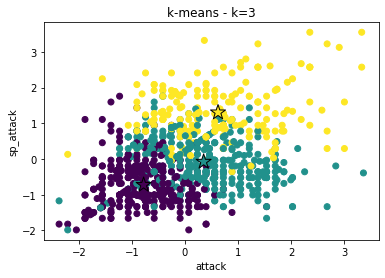

In [71]:
plt.scatter(X[:,2], X[:,4], c = y_preds)

# Identifying centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,4],
            marker='*', s = 250, c = [0,1,2], edgecolors='k')

plt.xlabel('attack')
plt.ylabel('sp_attack')
plt.title('k-means - k=3')
plt.show();

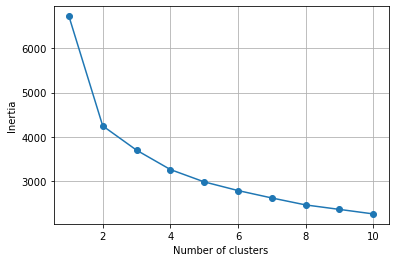

In [72]:
# Calculate inertia for a range of clusters number
inertia = []

for i in np.arange(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    inertia.append(km.inertia_)
    
# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show();

### 3. Reducing dimensionality

From the graphs, there are no clear clusters forming. 
However, let's remember that the distribution of `total_points` has two separet peaks:

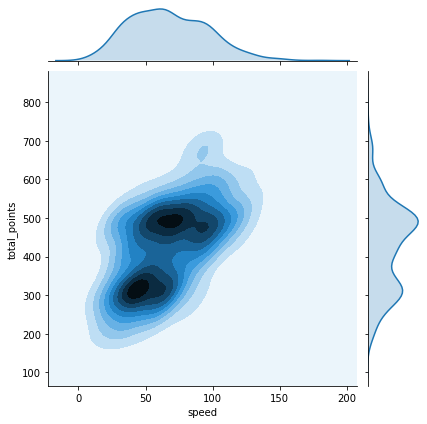

In [73]:
sns.jointplot(x=stats_df['speed'], y=stats_df['total_points'], kind="kde");

We will reduce dimensionality by selecting only two features: `speed` and `toal_points`.

In [74]:
reduced_df = stats_df[['speed', 'total_points']]
reduced_df

,speed,total_points
0,45.0,318.0
1,60.0,405.0
2,80.0,525.0
4,65.0,309.0
5,80.0,405.0
...,...,...
1022,148.0,720.0
1023,138.0,670.0
1024,128.0,720.0
1025,138.0,670.0


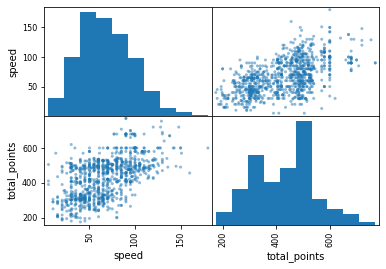

In [75]:
scatter_matrix(reduced_df)

plt.show()

In [76]:
# Instantiate the scaler
scaler = StandardScaler()

# Compute mean and std to be used for scaling

scaler.fit(reduced_df)
X = scaler.transform(reduced_df)

# Instantiate
kmeans = KMeans(n_clusters = 2)

# Fit
kmeans.fit(X)

# Make predictions
y_preds = kmeans.predict(X)

print(y_preds)

[0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 

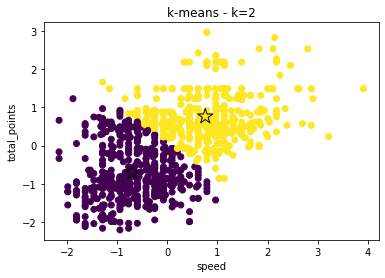

In [77]:
plt.scatter(X[:,0], X[:,1], c = y_preds)

# Identifying centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='*', s = 250, c = [0,1], edgecolors='k')

plt.xlabel('speed')
plt.ylabel('total_points')
plt.title('k-means - k=2')
plt.show();

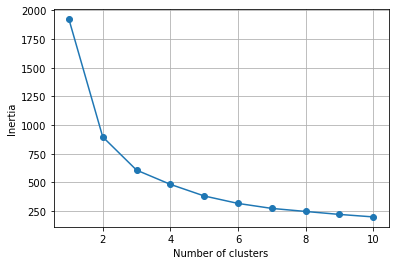

In [78]:
# Calculate inertia for a range of clusters number
inertia = []

for i in np.arange(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    inertia.append(km.inertia_)
    
# Plotting
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show();

There is no clear elbow in the inertia graph besides from 1 to 2 clusters.

Lets add `y_preds` as a new column in our **pokemon_df** dataframe.

In [91]:
cluster_df = pokemon_df
cluster_df['cluster'] = y_preds

cluster_df.head(10)

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,cluster
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,0
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,0
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,...,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,0
5,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,...,45.0,70.0,142.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,...,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1
9,7,Squirtle,1,Normal,Tiny Turtle Pokémon,1,Water,NaN,0.5,9.0,...,45.0,70.0,63.0,Medium Slow,2,Monster,Water 1,87.5,20.0,0
10,8,Wartortle,1,Normal,Turtle Pokémon,1,Water,NaN,1.0,22.5,...,45.0,70.0,142.0,Medium Slow,2,Monster,Water 1,87.5,20.0,0
11,9,Blastoise,1,Normal,Shellfish Pokémon,1,Water,NaN,1.6,85.5,...,45.0,70.0,239.0,Medium Slow,2,Monster,Water 1,87.5,20.0,1
13,10,Caterpie,1,Normal,Worm Pokémon,1,Bug,NaN,0.3,2.9,...,255.0,70.0,39.0,Medium Fast,1,Bug,NaN,50.0,15.0,0


In [81]:
cluster_1 = cluster_df.loc[cluster_df['cluster'] == 0]
cluster_2 = cluster_df.loc[cluster_df['cluster'] == 1]

### Distributions along the two clusters

We are naming **cluster 1** the slow-speed low-points cluster amd **cluster 2** the high-speed high-points one.

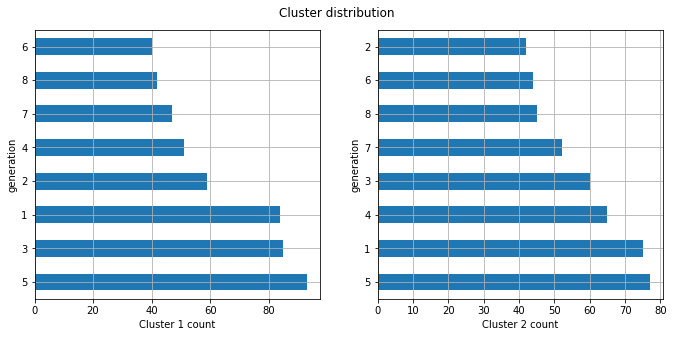

In [103]:
def cluster_dist(col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    pd.value_counts(cluster_1[col].values).plot(kind='barh', ax = ax1)
    ax1.grid()
    ax1.set_xlabel('Cluster 1 count')
    ax1.set_ylabel(col)

    pd.value_counts(cluster_2[col].values).plot(kind='barh', ax = ax2)
    ax2.grid()
    ax2.set_xlabel('Cluster 2 count')
    ax2.set_ylabel(col)

    fig.suptitle('Cluster distribution')
    fig.tight_layout(pad=3.0)
    
cluster_dist('generation')


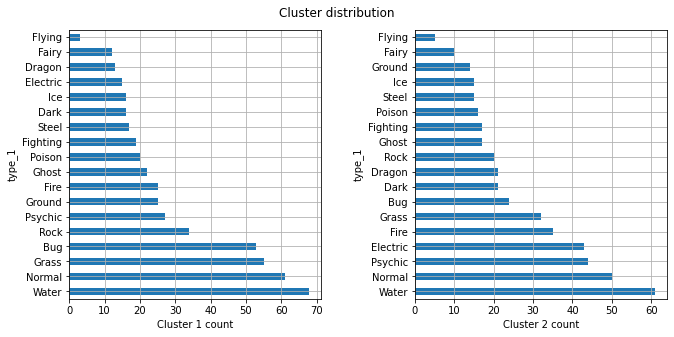

In [104]:
cluster_dist('type_1')

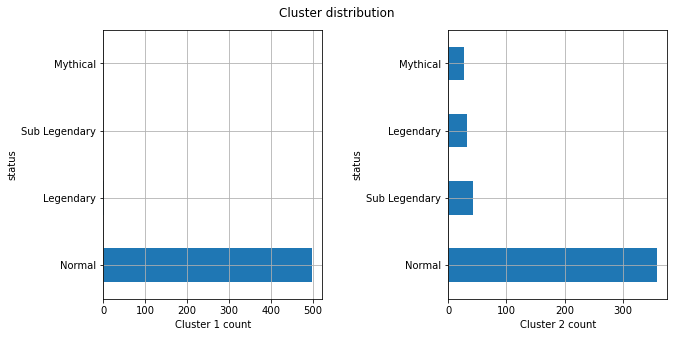

In [107]:
cluster_dist('status')

As expected, there are no Mythical, Legendary or Sub Legendary pokemon in cluster 1.